In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

In [174]:
main_df = pd.read_csv("data/diamonds.csv")
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         388 non-null     object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159096 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

In [175]:
main_df

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,NaN,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,NaN,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,NaN,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,NaN,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [176]:
df = main_df.copy()

### Shape
Type of diamond shape, mostly be `round` shape

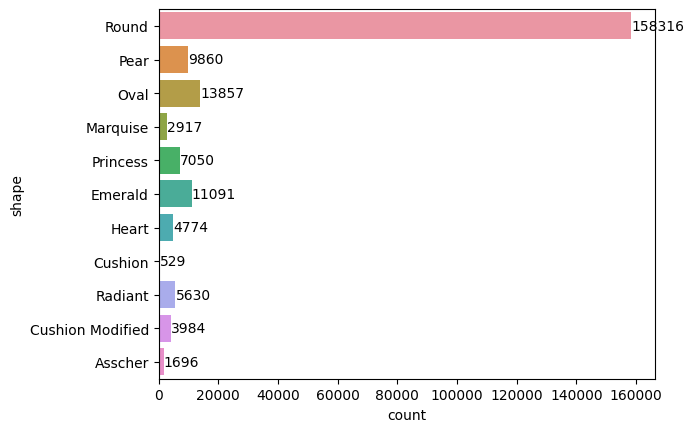

In [177]:
ax = sns.countplot(data=df, y="shape")
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='size', ylabel='total_sales_price'>

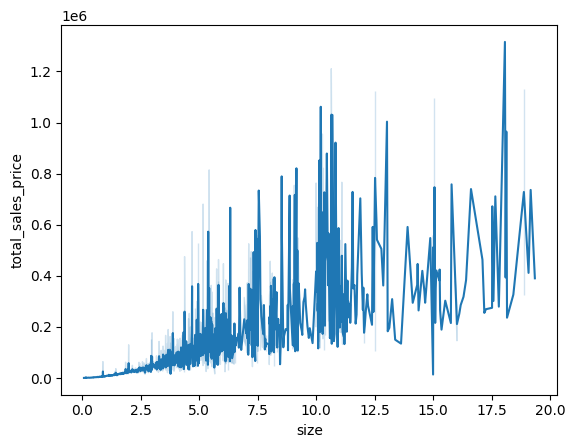

In [178]:
sns.lineplot(data=df, x="size", y="total_sales_price")

<Axes: xlabel='size', ylabel='Density'>

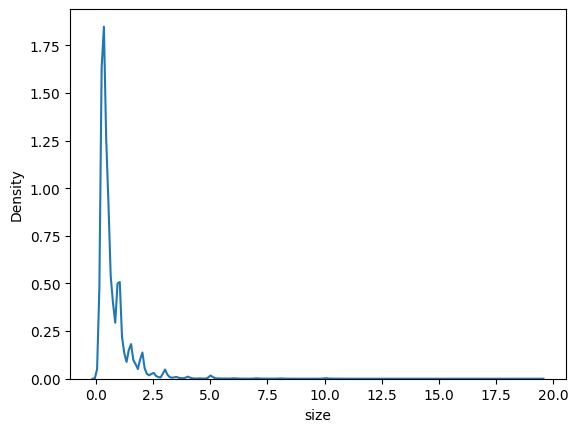

In [179]:
sns.kdeplot(data=df, x="size")

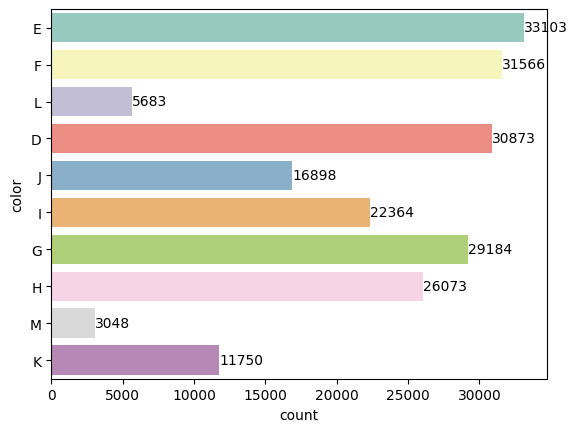

In [180]:
ax = sns.countplot(data=df, y="color", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()

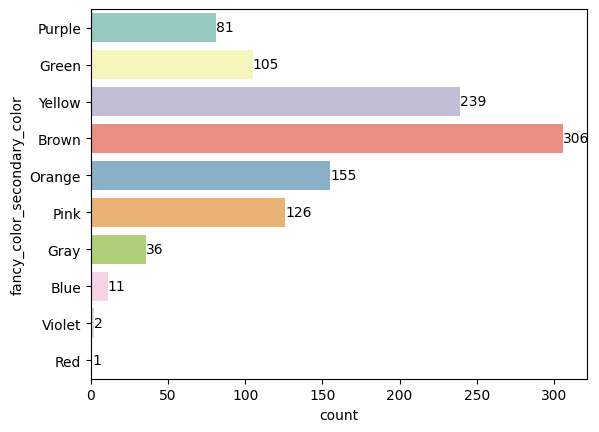

In [181]:
ax = sns.countplot(data=df, y="fancy_color_secondary_color", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()


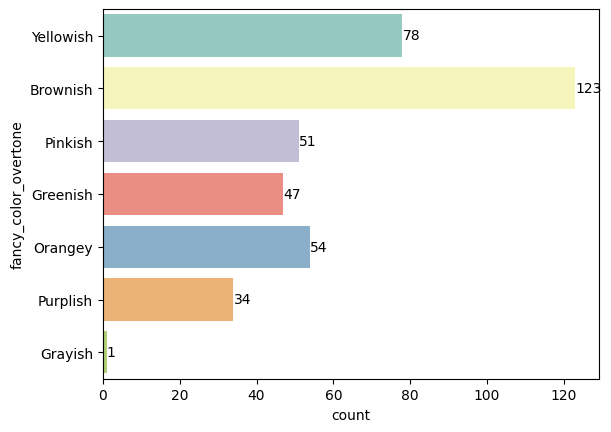

In [182]:
ax = sns.countplot(data=df, y="fancy_color_overtone", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()


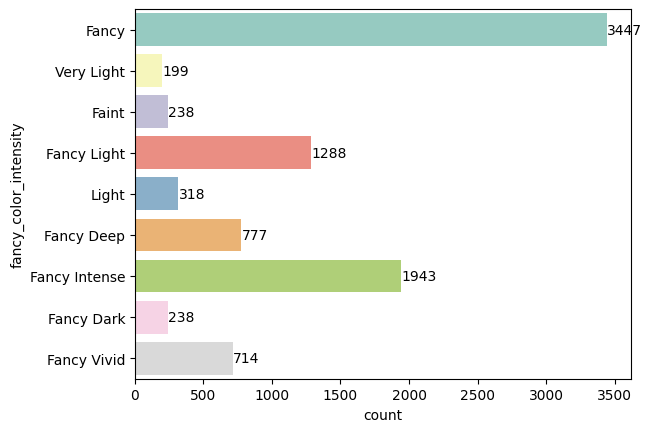

In [183]:
ax = sns.countplot(data=df, y="fancy_color_intensity", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()

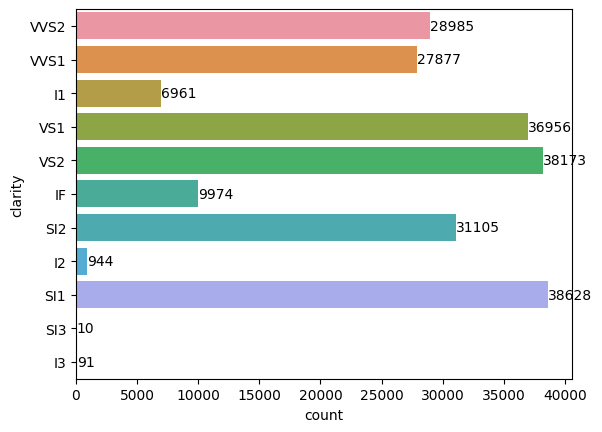

In [184]:
ax = sns.countplot(data=df, y="clarity")
ax.bar_label(ax.containers[0])
plt.show()

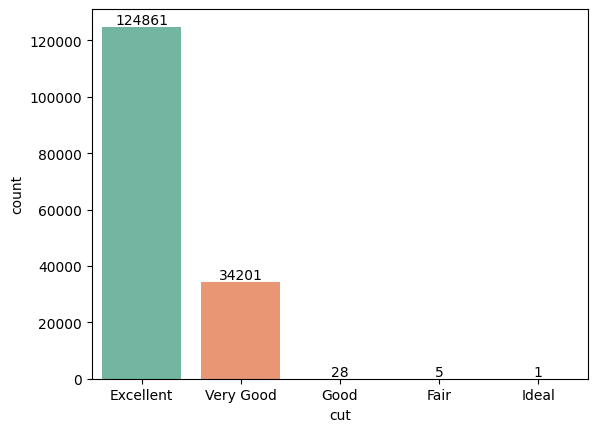

In [185]:
ax = sns.countplot(data=df, x="cut", palette='Set2')
ax.bar_label(ax.containers[0])
plt.show()

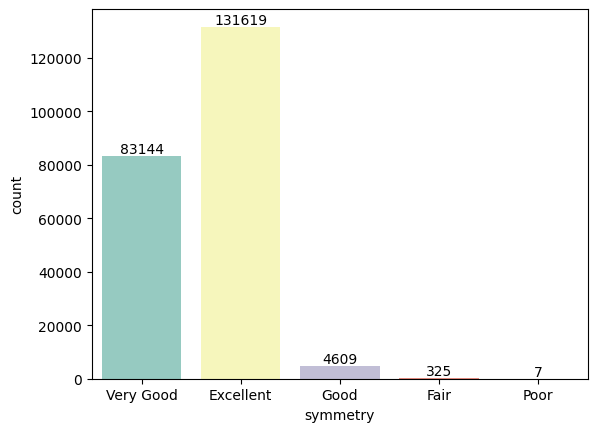

In [186]:
ax = sns.countplot(data=df, x="symmetry", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()

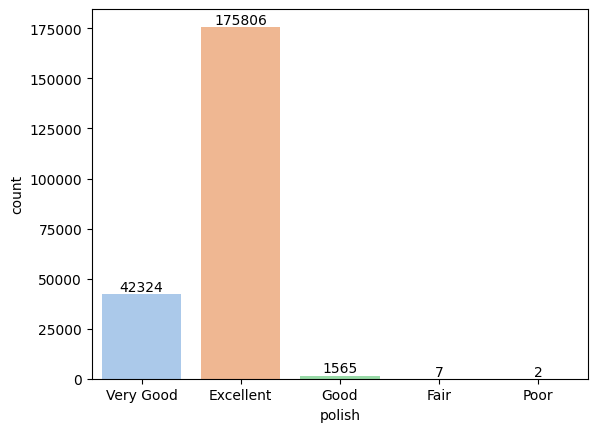

In [187]:
ax = sns.countplot(data=df, x="polish", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

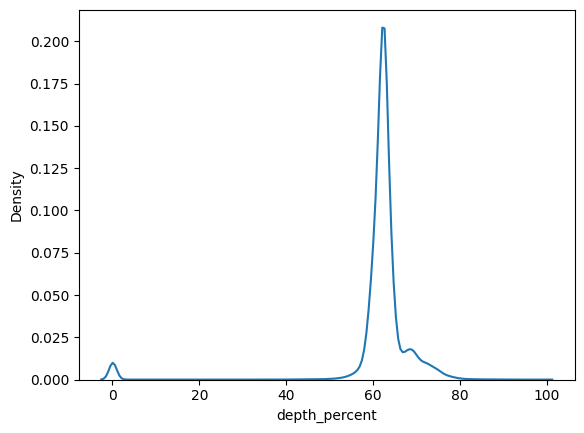

In [188]:
ax = sns.kdeplot(data=df, x="depth_percent")
plt.show()

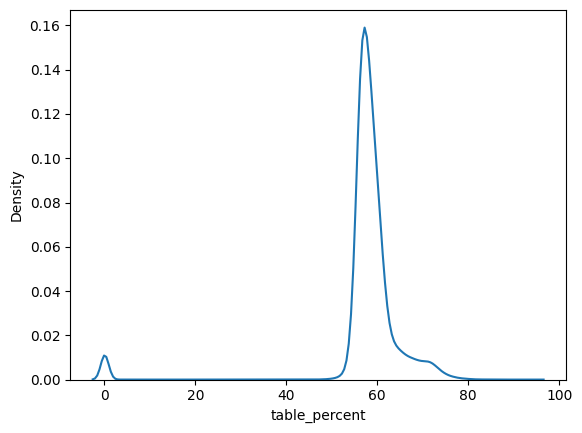

In [189]:
ax = sns.kdeplot(data=df, x="table_percent")
plt.show()

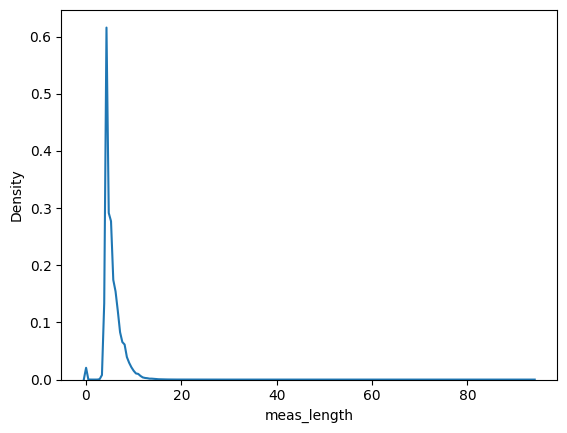

In [190]:
ax = sns.kdeplot(data=df, x="meas_length")
plt.show()

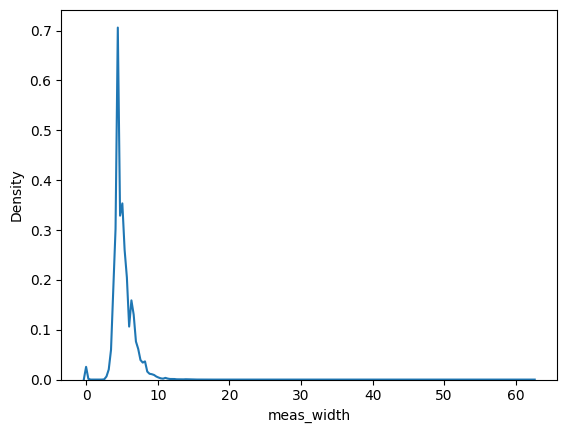

In [191]:
ax = sns.kdeplot(data=df, x="meas_width")
plt.show()

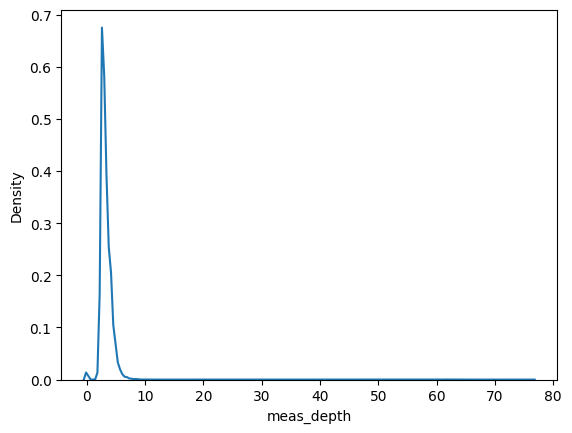

In [192]:
ax = sns.kdeplot(data=df, x="meas_depth")
plt.show()

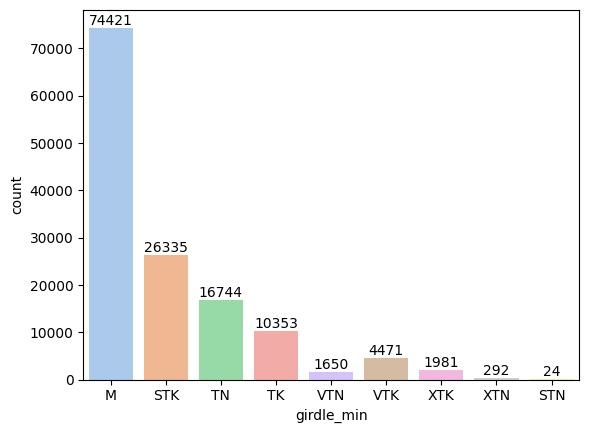

In [193]:
ax = sns.countplot(data=df, x="girdle_min", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

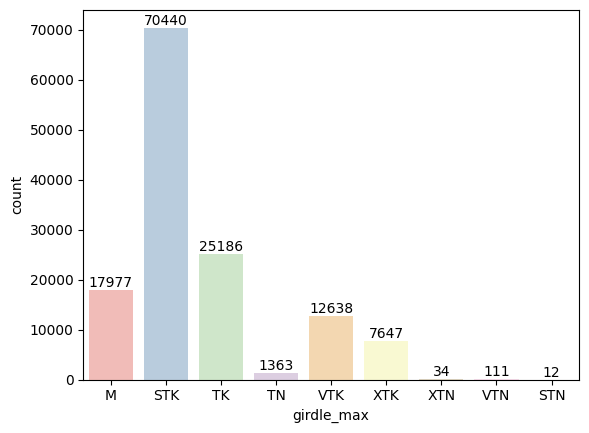

In [194]:
ax = sns.countplot(data=df, x="girdle_max", palette='Pastel1')
ax.bar_label(ax.containers[0])
plt.show()

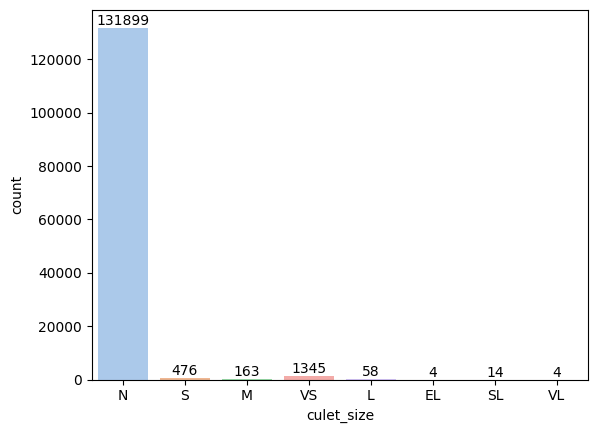

In [195]:
ax = sns.countplot(data=df, x="culet_size", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

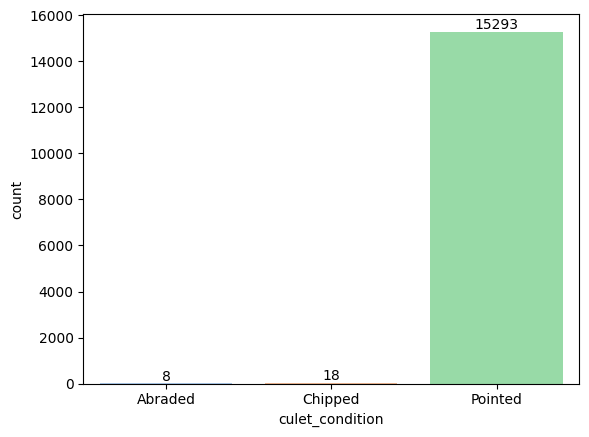

In [196]:
ax = sns.countplot(data=df, x="culet_condition", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

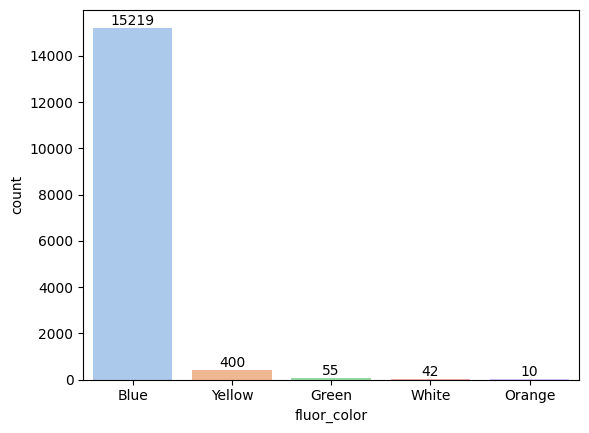

In [197]:
ax = sns.countplot(data=df, x="fluor_color", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

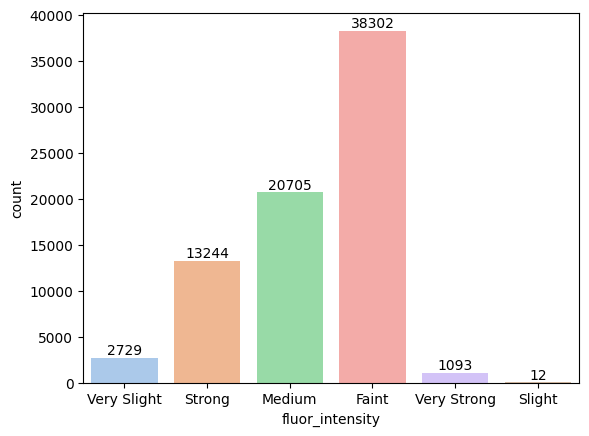

In [198]:
ax = sns.countplot(data=df, x="fluor_intensity", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

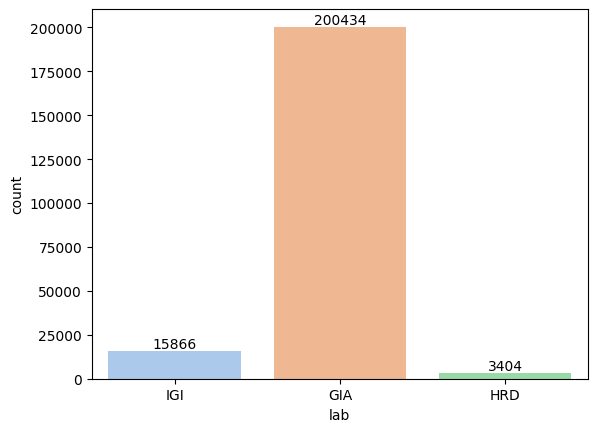

In [199]:
ax = sns.countplot(data=df, x="lab", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

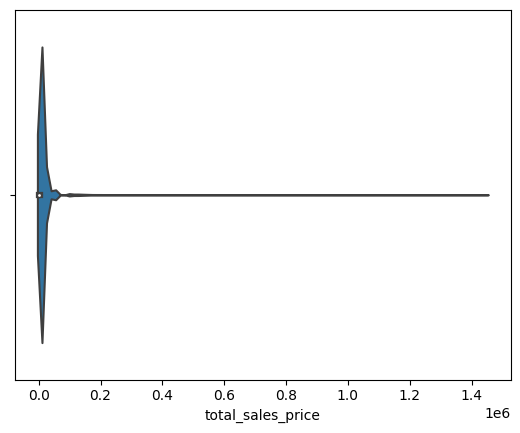

In [200]:
ax = sns.violinplot(data=df, x="total_sales_price")
plt.show()

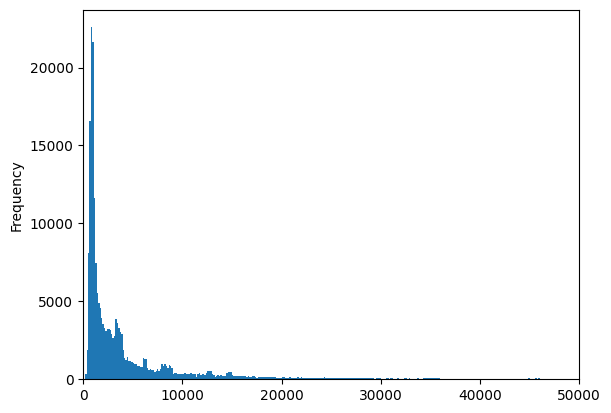

In [201]:
ax = main_df['total_sales_price'].plot.hist(bins=10000)
ax.set_xlim(0, 50000)
plt.show()

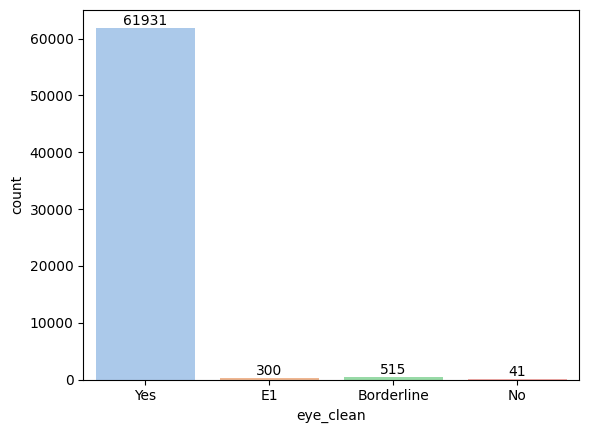

In [202]:
ax = sns.countplot(data=df, x="eye_clean", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

In [203]:
df['date'].unique()

array(['2022-02-24'], dtype=object)

In [204]:
sns.pairplot(df, hue="total_sales_price")

![pairplot main dataframe](public/pairplot_maindf.png)